In [1]:
import ast
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
metrics_data_path = "C:/Data_MSc_Thesis/Results/SBFS_Trail_Run_metrics.csv"
metrics_df = pd.read_csv(metrics_data_path)

results_file_path = "C:/Data_MSc_Thesis/Results/SBFS_Trail_Run_top_features.txt"

with open(results_file_path, "r") as file:
    results_string = file.read().strip()  

results = ast.literal_eval(results_string)
#print(results)

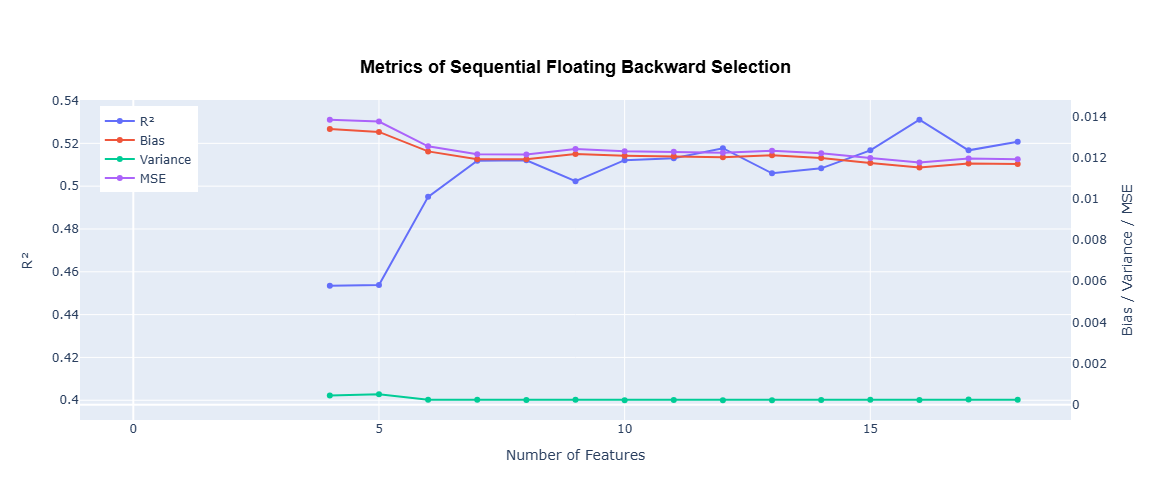

In [16]:
fig = go.Figure()
# Function to format the feature list with 4 entries per line
def format_feature_list(features):
    lines = [', '.join(features[i:i+4]) for i in range(0, len(features), 4)]
    return '<br>'.join(lines)  # Use <br> for line breaks in hover text

# Create hover text for the selected features
hover_text = [f"<b>Selected Features:</b><br>{format_feature_list(results[n])}" if n in results else ""
              for n in metrics_df.index]

fig.add_trace(go.Scatter(x=metrics_df.index, y=metrics_df['r2'], 
                         mode='lines+markers', name='R²', yaxis='y1'))
fig.add_trace(go.Scatter(x=metrics_df.index, y=metrics_df['bias'], 
                         mode='lines+markers', name='Bias', yaxis='y2'))
fig.add_trace(go.Scatter(x=metrics_df.index, y=metrics_df['var'], 
                         mode='lines+markers', name='Variance', yaxis='y2'))
fig.add_trace(go.Scatter(x=metrics_df.index, y=metrics_df['mse'], 
                         mode='lines+markers', name='MSE', yaxis='y2'))

# Add a dummy trace for the feature list hover text
fig.add_trace(go.Scatter(x=metrics_df.index, 
                         y=[0.4] * len(metrics_df),              # Set y to 0 (or a value outside the visible range)
                         mode='lines+markers', 
                         hovertext=hover_text,                   # Add hover text here
                         hovertemplate="<b>Number of Features:</b> %{x}<br>%{hovertext}<extra></extra>",
                         showlegend=False,                       # Hide this trace from the legend
                         marker=dict(opacity=0),                 # Make markers invisible
                         line=dict(width=0))                     # Make lines invisible
             )

fig.update_layout(title=dict(text="Metrics of Sequential Floating Backward Selection",
                             x=0.5, y=0.88, xanchor='center', 
                             font=dict(size=18, family="Arial", color="black", weight="bold")),
                  xaxis_title="Number of Features",
                  yaxis=dict(title="R²", side="left"),
                  yaxis2=dict(title="Bias / Variance / MSE", side="right", overlaying='y', showgrid=False),
                  legend=dict(x=0.02, y=0.98),
                  width=800, height=500,
                  hovermode='x unified'
)

fig.show()

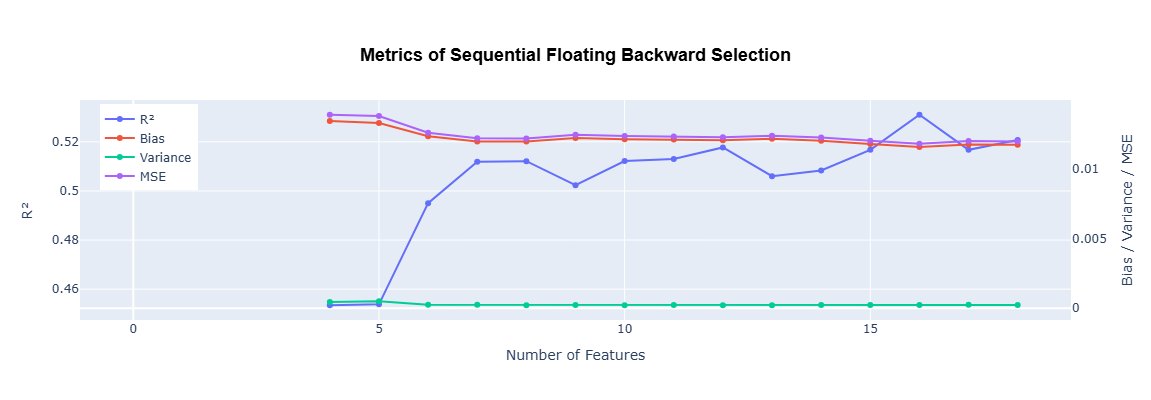

In [14]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=metrics_df.index, y=metrics_df['r2'], 
                         mode='lines+markers', name='R²', 
                         yaxis='y1'))

fig.add_trace(go.Scatter(x=metrics_df.index, y=metrics_df['bias'], 
                         mode='lines+markers', name='Bias', 
                         yaxis='y2'))
fig.add_trace(go.Scatter(x=metrics_df.index, y=metrics_df['var'], 
                         mode='lines+markers', name='Variance', 
                         yaxis='y2'))
fig.add_trace(go.Scatter(x=metrics_df.index, y=metrics_df['mse'], 
                         mode='lines+markers', name='MSE', 
                         yaxis='y2'))

fig.update_layout(title=dict(
    text="Metrics of Sequential Floating Backward Selection",
    x=0.5,y=0.88, xanchor='center', font=dict(size=18, family="Arial", color="black", weight="bold")),
    xaxis_title="Number of Features",
    yaxis=dict(title="R²", side="left"),
    yaxis2=dict(title="Bias / Variance / MSE", side="right", overlaying='y', showgrid=False),
    legend=dict(x=0.02, y=0.98),
    width=800, height=400,
    hovermode='x unified')

fig.show()

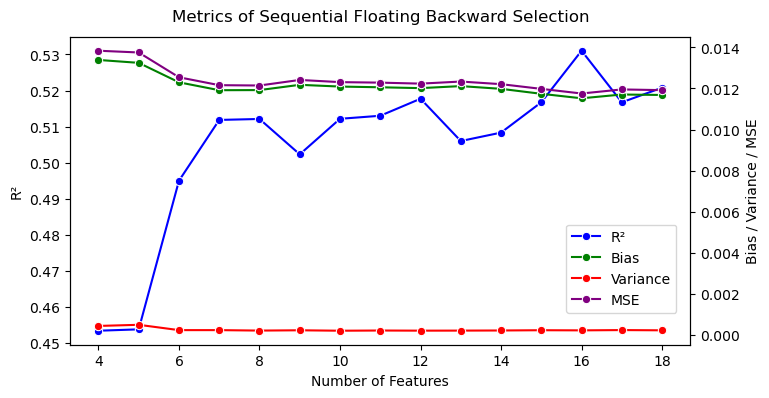

In [13]:
fig, ax1 = plt.subplots(figsize=(8, 4))

sns.lineplot(x=metrics_df.index, y=metrics_df['r2'], ax=ax1, marker='o', label='R²', color='blue')
ax1.set_xlabel("Number of Features")
ax1.set_ylabel("R²")
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
sns.lineplot(x=metrics_df.index, y=metrics_df['bias'], ax=ax2, marker='o', label='Bias', color='green')
sns.lineplot(x=metrics_df.index, y=metrics_df['var'], ax=ax2, marker='o', label='Variance', color='red')
sns.lineplot(x=metrics_df.index, y=metrics_df['mse'], ax=ax2, marker='o', label='MSE', color='purple')
ax2.set_ylabel("Bias / Variance / MSE", color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.legend().set_visible(False)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(0.80, 0.39), borderaxespad=0)

plt.title("Metrics of Sequential Floating Backward Selection", fontsize=12, pad=20, y=0.96)
plt.show()